In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_7d161f2cdceb45adb285134567419295 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1AXZsItUms5S6VIoO1uy9qn61n4Hiiu7a-kfRH0BzSOv',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_7d161f2cdceb45adb285134567419295.get_object(Bucket='predictinglifeexpectancyusingmach-donotdelete-pr-083yhjhtifbr2k',Key='datasets_12603_17232_Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
df = df_data_1
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


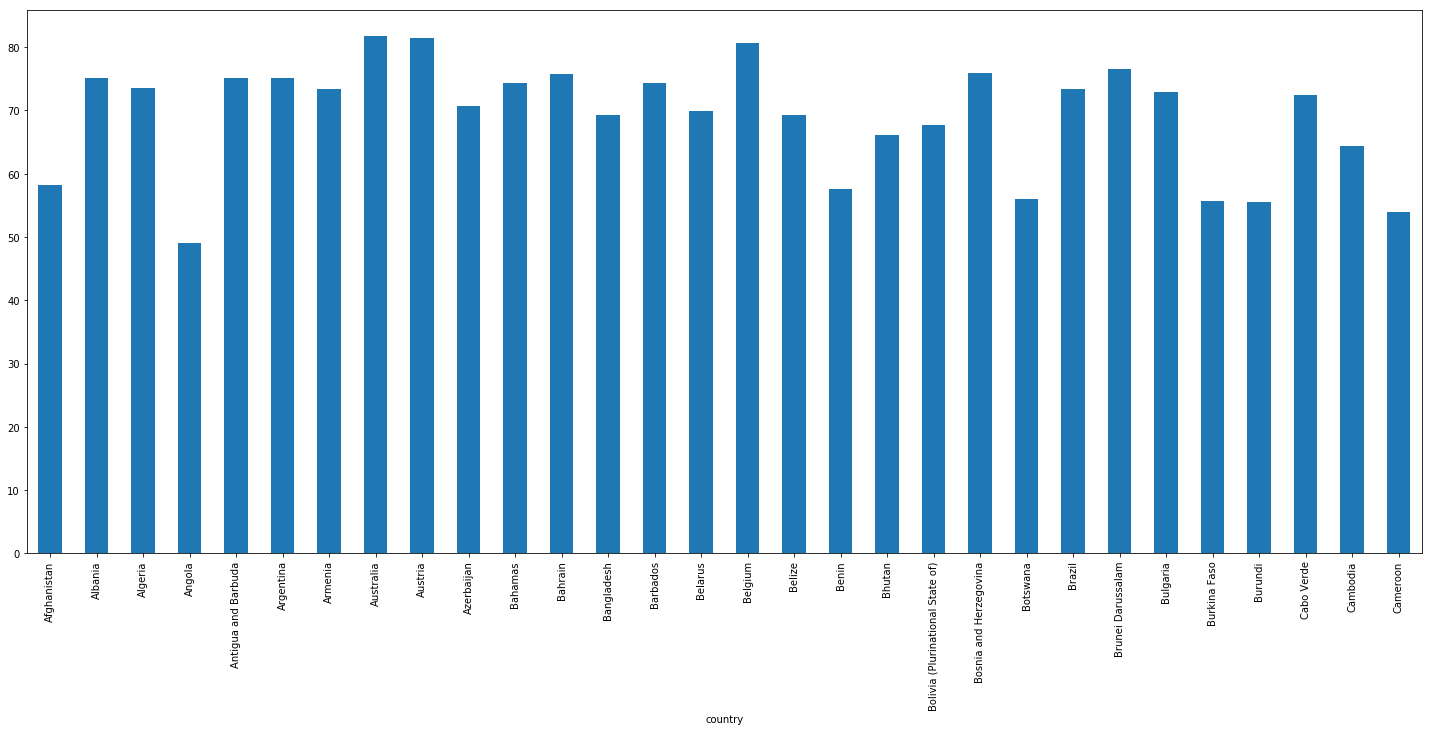

In [4]:
df.rename(columns = lambda x: x.strip().replace(' ', '_').lower(), inplace=True)
df.rename(columns = {'thinness__1-19_years':'thinness_10-19_years'}, inplace=True)

plt.figure(figsize=(25,10))
df.groupby('country')['life_expectancy'].mean().head(30).plot.bar()

In [5]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_10-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [7]:
#list of all columns containing NA values
na_cols =['life_expectancy', 'adult_mortality', 'alcohol', 'hepatitis_b',
       'bmi', 'polio', 'total_expenditure','diphtheria', 'gdp', 'population', 
        'thinness_10-19_years', 'thinness_5-9_years', 
        'income_composition_of_resources', 'schooling']

#filling NA cells with overall mean
for col in na_cols:
    df[col].fillna(df[col].mean(), inplace=True)

**correlation table**


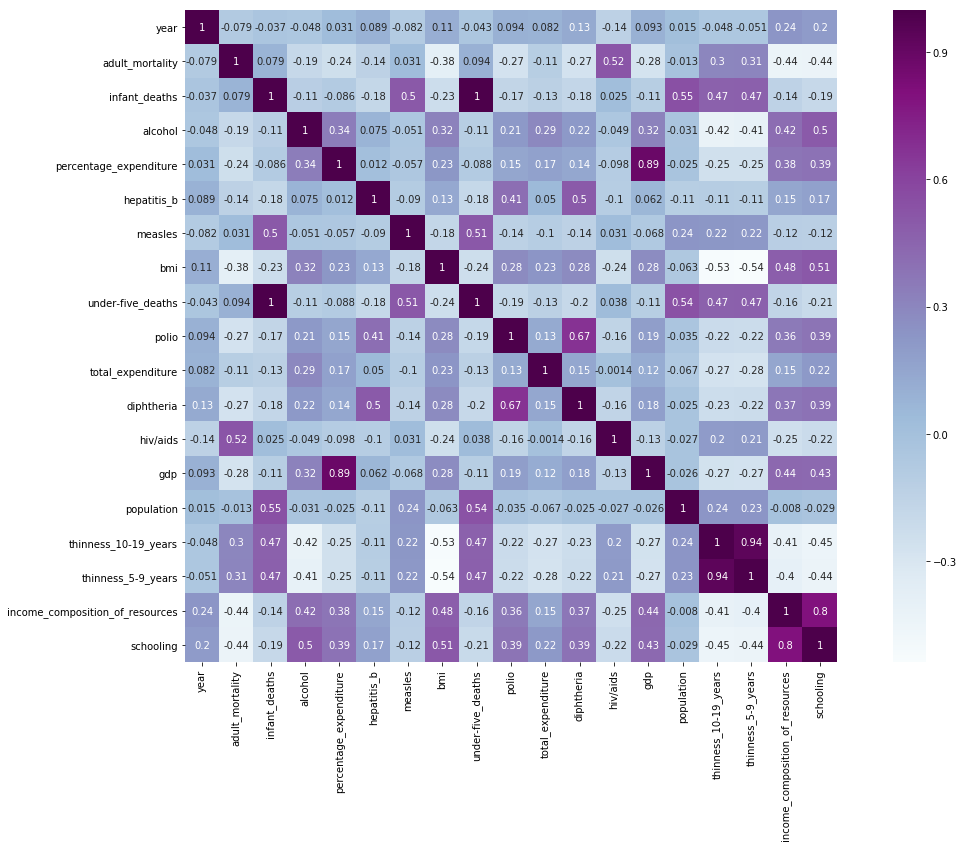

In [8]:
train_data=df.drop(['life_expectancy'],axis=1)
train_labels = df['life_expectancy']

corr = train_data.corr()
plt.figure(figsize=(20,12))
print('**correlation table**')
sns.heatmap(corr,square=True,cmap="BuPu",annot=True)

In [9]:
col_corr = []
for i in range(len(corr.columns)):
        for j in range(i):
            if (corr.iloc[i, j] >= 0.9) and (corr.columns[j] not in col_corr):
                colname = corr.columns[i] # getting the name of column
                if colname not in col_corr:
                    col_corr.append(colname)
                if colname in train_data.columns:
                    del train_data[colname]

#'under-five_deaths', 'thinness_5-9_years' columns are removed

In [10]:
X = train_data.iloc[:,3:].values
y = train_labels.values

import statsmodels.api as sm

mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

print(p_values)

x1      1.934024e-20
x2      8.814601e-01
x3      9.782452e-02
x4      6.545038e-01
x5      8.319670e-30
x6      4.331996e-03
x7      3.483851e-41
x8      3.207873e-26
x9      3.972871e-58
x10     2.642926e-13
x11     2.197431e-61
x12     6.168999e-01
x13     6.111093e-01
x14     1.245364e-68
x15     4.426555e-28
x16    1.347924e-106
Name: P>|t|, dtype: float64


In [11]:
columns = train_data.columns
reduce = []
for i in range(len(p_values)):
    if(p_values[i]>0.05):
        print(columns[i+3],p_values[i])
        reduce.append(columns[i+3])
        
#drop columns with higher p_values
train_data=train_data.drop(reduce,axis=1)

columns = train_data.columns
print(columns)

infant_deaths 0.8814600848870734
alcohol 0.09782452484648317
percentage_expenditure 0.6545037967086833
gdp 0.6168999457312259
population 0.6111092930813469
Index(['country', 'year', 'status', 'adult_mortality', 'hepatitis_b',
       'measles', 'bmi', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'thinness_10-19_years', 'income_composition_of_resources',
       'schooling'],
      dtype='object')


In [12]:
train_data = train_data.drop(['country'],axis=1)

X = train_data.iloc[:,:].values
y = train_labels.values

from sklearn.preprocessing import LabelEncoder
# labelencoder_X = LabelEncoder()
# X[:,0] = labelencoder_X.fit_transform(X[:,0])
labelencoder_X_2 = LabelEncoder()
X[:,1] = labelencoder_X_2.fit_transform(X[:,1])

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [13]:
reger = RandomForestRegressor(n_estimators= 50, random_state = 0)
reger.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [14]:
y_pred = reger.predict(X_test)

#mse
mse=mean_squared_error(y_test, y_pred)
#r2
r2=r2_score(y_test,y_pred)
#mae
mae=mean_absolute_error(y_test,y_pred)
#rmse
rmse=np.sqrt(mae)
{'mse':[mse],'r2':[r2],'mae':[mae],'rmse':[rmse]}

{'mse': [4.244752781842068],
 'r2': [0.9546489302678504],
 'mae': [1.2924261296048476],
 'rmse': [1.136849211463353]}

In [15]:
#accuracy
error = []
for i in range(len(y_test)):
    a=abs(y_test[i]-y_pred[i])
    error.append(a)
acc=100-(sum(error)/len(y_test))

acc

98.70757387039515

In [16]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-15 10:55:13,908 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [17]:
wml_credentials={
   "apikey": "l0wCDZxU-IaOrnaau_EK2UheH9po7LFNHLTHkRkRc7Qd",
  "instance_id": "d0f2c189-ad40-47ad-a119-ea6d88a5b15c",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [18]:

client = WatsonMachineLearningAPIClient( wml_credentials )

model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "ANUJ KUMAR PRADHAN", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "anujpradhan208@gmail.com", 
               client.repository.ModelMetaNames.NAME: "LIFE EXPECTANCY USING MACHINE LEARNING"}

model_artifact =client.repository.store_model(reger, meta_props=model_props)

published_model_uid = client.repository.get_model_uid(model_artifact)

published_model_uid

'28aef1d5-0021-4514-a0e9-0eb8ce126df2'

In [19]:
deployment = client.deployments.create(published_model_uid, name="lifeexpectancy")



#######################################################################################

Synchronous deployment creation for uid: '28aef1d5-0021-4514-a0e9-0eb8ce126df2' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='0d6c1fa1-023c-457e-b96d-5a658229e342'
------------------------------------------------------------------------------------------------




In [20]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/d0f2c189-ad40-47ad-a119-ea6d88a5b15c/deployments/0d6c1fa1-023c-457e-b96d-5a658229e342/online'